In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [39]:
df=pd.read_csv('dataset2.txt',names=['Test1','Test2','QA'])
df.sample(5)

,Test1,Test2,QA
39,0.22984,-0.41155,1
40,0.29320,-0.22880,1
10,0.38537,-0.56506,1
55,-0.43836,0.21711,1
4,-0.51325,0.46564,1


In [40]:
print(df.describe())
print('\nsize of dataset:',df.shape)

            Test1       Test2          QA
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646563    1.000000
max      1.070900    1.108900    1.000000

size of dataset: (118, 3)


In [41]:
X=df[['Test1','Test2']]
y=df['QA']

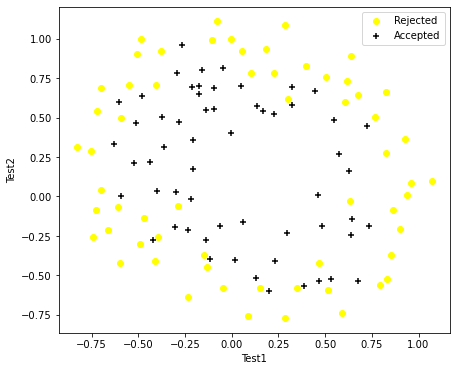

In [42]:
plt.figure(figsize=(7,6))
plt.scatter(X[y==0]['Test1'],X[y==0]['Test2'],marker='o',c='yellow')
plt.scatter(X[y==1]['Test1'],X[y==1]['Test2'],marker='+',c='Black')
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend(['Rejected','Accepted'])
plt.show()

In [43]:
X.isnull().any()

Test1    False
Test2    False
dtype: bool

In [44]:
from sklearn import svm

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10,shuffle=True)

In [84]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(svm.SVC(gamma='auto'),{
    'kernel':['rbf','linear'],
    'C':[1,10,20,30,40]
},cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20, 30, 40], 'kernel': ['rbf', 'linear']})

In [85]:
df=pd.DataFrame(clf.cv_results_)
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.661404
1,1,linear,0.511111
2,10,rbf,0.788889
3,10,linear,0.511111
4,20,rbf,0.830994
5,20,linear,0.511111
6,30,rbf,0.799415
7,30,linear,0.511111
8,40,rbf,0.799415
9,40,linear,0.511111


In [86]:
clf.best_params_

{'C': 20, 'kernel': 'rbf'}

In [87]:
clf=svm.SVC(gamma='auto',C=20,kernel='rbf')

In [88]:
clf.fit(X_train,y_train)

SVC(C=20, gamma='auto')

In [89]:
y_pred=clf.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.875

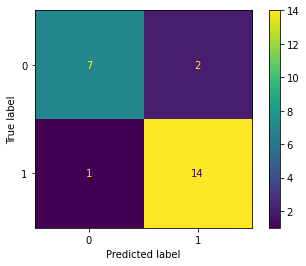

In [91]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)
plt.show()